In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Datad.csv')

In [3]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [7]:
from sklearn.model_selection import train_test_split

In [16]:
X = df.drop(columns =['stabf'])
y = df.stabf
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=1)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [19]:
standard_train_X = scaler.fit_transform(X_train)
standard_train_X = pd.DataFrame(standard_train_X, columns=X_train.columns)
X_test = X_test.reset_index(drop=True)
standard_test_X = scaler.transform(X_test)
standard_test_X = pd.DataFrame(standard_test_X, columns=X_test.columns)

In [20]:
def train_model(model, X_train = standard_train_X, y_train = y_train, X_test = standard_test_X):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
   
    return classification_report(y_pred, y_test)

In [27]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
lgbm = LGBMClassifier(random_state=1)
rfc = RandomForestClassifier(random_state=1)
extc = ExtraTreesClassifier(random_state=1)

In [28]:
lgbm.fit(standard_train_X, y_train)
accuracy_score(y_true=y_test, y_pred=lgbm.predict(standard_test_X))

0.9395

In [29]:
rfc.fit(standard_train_X, y_train)
accuracy_score(y_true=y_test, y_pred=rfc.predict(standard_test_X))

0.929

In [31]:
extra_tree_forest = ExtraTreesClassifier() 

extra_tree_forest.fit(standard_train_X, y_train) 

feature_importance = extra_tree_forest.feature_importances_ 

feature_importance_normalized = np.std([tree.feature_importances_ for tree in extra_tree_forest.estimators_], axis = 0) 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Comparison of different Feature Importances')

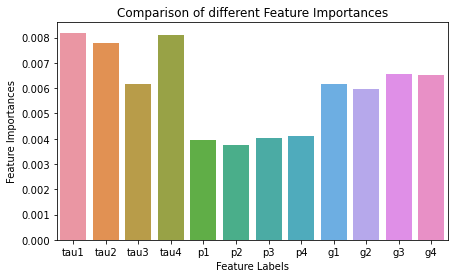

In [33]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(7, 4))
sns.barplot(standard_train_X.columns, feature_importance_normalized) 
plt.xlabel('Feature Labels') 
plt.ylabel('Feature Importances') 
plt.title('Comparison of different Feature Importances')  